In [5]:
from wordcloud import WordCloud
import pandas as pd
from konlpy.tag import *
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
import matplotlib.image as mpimg

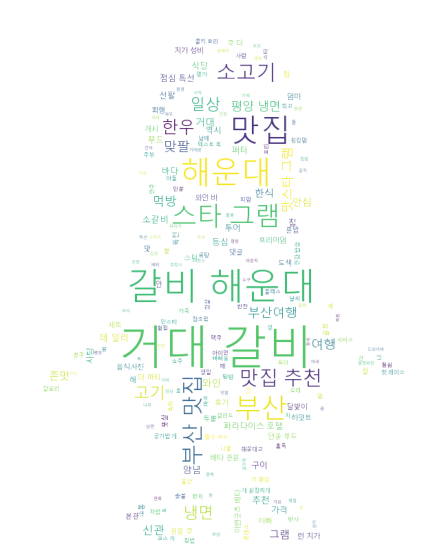

In [14]:
# csv 파일 내 태그 리스트를 하나의 문자열로 만들기
data = pd.read_csv('insta_식당_해시태그/insta_거대갈비해운대.csv')
tag_str = ''
for i in data['#거대갈비']:
    # 칼럼값이 없을 경우 처리
    if type(i) is float:
        continue
    tag_str += i
    
# #을 기준으로 문자열을 분리 후 리스트로 만듦
taglist=tag_str.split('#')

# #이 제거된 태그 내용들을 다시 하나의 문자열로 만듦
str2 = ''
for i in taglist:
    str2 += i
    str2 += ' '

# 태그 리스트에서 형태소 분석하기
okt = Okt()
# 문자열에서 명사만 추출하기
nouns = okt.nouns(str2)

# 명사만 추출한 결과를 다시 하나의 문자열로 만듦
tag_str = ''
for i in nouns:
    tag_str += i
    tag_str += ' '

# 단어들을 집계하고 데이터프레임으로 저장. csv 파일을 만듦.
# 단어 집계
count = Counter(nouns)
# 값을 기준으로 내림차순 정렬
sorted_count = sorted(count.items(), key = lambda item: item[1], reverse=True)
# 데이터프레임으로 저장
df = pd.DataFrame(sorted_count, columns = {'단어','빈도수'})
# csv 파일 생성
df.to_csv('counting_식당_해시태그/거대갈비해운대.csv', index=False, encoding='utf-8-sig')

# 워드클라우드 이미지파일 생성 및 확인
# boogi 이미지파일의 형태로 저장하기 위해 mask 사용
boogi_mask = np.array(Image.open('boogi_black.png'))
font_path = 'C:/Windows/Fonts/malgunsl.ttf'
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path, mask = boogi_mask).generate(tag_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis("off")
wc.to_file("boogi_식당/거대갈비해운대.jpg")
plt.show()